[[0.8 0. ]
 [0.  0.2]]
[[0.80211979 0.        ]
 [0.         0.19788021]]


/tmp/ipykernel_6696/1336586889.py:36: RuntimeWarning: divide by zero encountered in double_scalars
  values.append(1/np.sqrt(n))


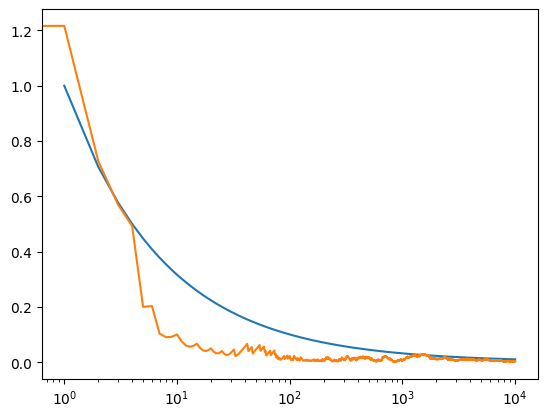

In [119]:
#Ex 5.2 a
# import qiskit
import numpy as np
import matplotlib.pyplot as plt

p = 0.2
N = 10000
sigmaX = np.array([[0., 1.],[1., 0.]])
state_vec = np.array([1., 0.])
state_ground = np.tensordot(state_vec.conj().T, state_vec,0)
state_dens = np.tensordot(state_vec.conj().T, state_vec,0)
state_teoretical = (1-p)*state_ground + p*(np.tensordot(np.tensordot(sigmaX, state_ground,1),sigmaX,1))
print(state_teoretical)

states = []
states.append(np.linalg.norm(state_dens - state_teoretical))[0,1,0,0],
                [0,0,0,1],
                [0,0,1,0]])

for n in range(N):
    if (np.random.rand() < p):
        state_dens += np.array([[0., 0.],[0., 1.]])
    else:
        state_dens += np.array([[1., 0.],[0., 0.]])
    
    states.append(np.linalg.norm(1./(n+1)*state_dens - state_teoretical))



print(state_dens/(N+1))


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

values = []
for n in range(N):
    values.append(1/np.sqrt(n))

plt.plot(values)
plt.plot(states)

plt.xscale('log')




[[ 0.5927051 +0.00000000e+00j -0.10581499-4.63605772e-01j]
 [-0.10581499+4.63605772e-01j  0.4072949 -2.77555756e-17j]]
[[ 5920.94359225+5.61495295e-14j -1058.14992126-4.63605772e+03j]
 [-1058.14992126+4.63605772e+03j  4080.05640775-2.21406227e-13j]]
0.0009370977975735105


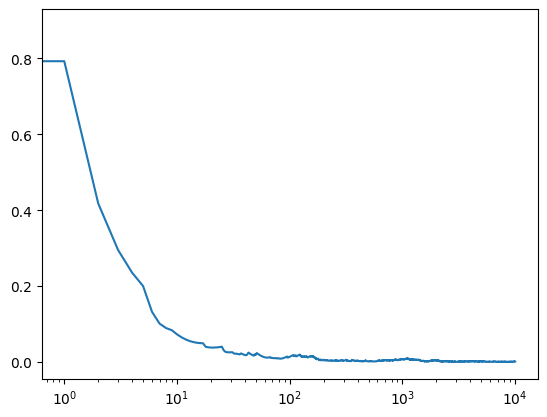

In [118]:
#EX 5.2 b
def rotY(theta):
    return np.array([[np.cos(theta/2), -1* np.sin(theta/2)],[np.sin(theta/2), np.cos(theta/2)]])

def rotZ(theta):
    return np.array([[np.cos(theta/2) - 1j*np.sin(theta/2), 0],[0, np.cos(theta/2) + 1j*np.sin(theta/2)]])

sigmaX = np.array([[0., 1.],[1., 0.]])


theta1 = 2*np.pi/5
theta2 = 2*np.pi*2/7


# import qiskit
import numpy as np
import matplotlib.pyplot as plt

p = 0.2
N = 10000

state_vec = np.array([1., 0.])
state_ground = np.tensordot(state_vec.conj().T, state_vec,0)
state_ground = np.tensordot(np.tensordot(rotY(theta1), state_ground, [1, 0]),rotY(theta1).conj().T, [1, 0])

state_teoretical = (1-p)*state_ground + p*(np.tensordot(np.tensordot(sigmaX, state_ground,1),sigmaX.conj().T,1))
state_teoretical = np.tensordot(np.tensordot(rotZ(theta2), state_teoretical, [1, 0]),rotZ(theta2).conj().T, [1, 0])


print(state_teoretical)

state_dens = np.array([[1. ,0.],[0., 0.]], dtype='complex128')

states = []
states.append(np.linalg.norm(state_dens - state_teoretical))

for n in range(N):
    new_state = state_ground
    if (np.random.rand() < p):
        new_state = np.tensordot(np.tensordot(sigmaX, state_ground, [1, 0]),sigmaX.conj().T, [1, 0])
    new_state = np.tensordot(np.tensordot(rotZ(theta2), new_state, [1, 0]),rotZ(theta2).conj().T, [1, 0])
    state_dens += new_state

    states.append(np.linalg.norm((1/(n+1))*state_dens - state_teoretical))



print(state_dens)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(states)
plt.xscale('log')

assert states[N] < 0.01
print(states[N])



[1. 0. 0. 0.]
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[ 0.5236068 +5.55111512e-17j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j -0.08465199-3.70884618e-01j]
 [ 0.        +0.00000000e+00j  0.1309017 +1.38777878e-17j
  -0.021163  -9.27211544e-02j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j -0.021163  +9.27211544e-02j
   0.0690983 -6.93889390e-18j  0.        +0.00000000e+00j]
 [-0.08465199+3.70884618e-01j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.2763932 -2.77555756e-17j]]
[[8006.+0.j    0.+0.j    0.+0.j    0.+0.j]
 [   0.+0.j 1995.+0.j    0.+0.j    0.+0.j]
 [   0.+0.j    0.+0.j    0.+0.j    0.+0.j]
 [   0.+0.j    0.+0.j    0.+0.j    0.+0.j]]


AssertionError: 

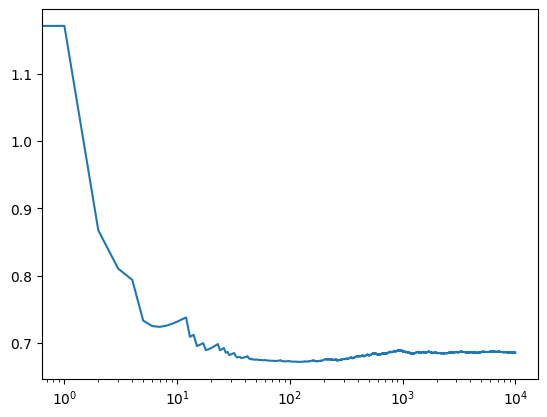

In [136]:

#Ex 5.2 c
def rotY(theta):
    return np.array([[np.cos(theta/2), -1* np.sin(theta/2)],[np.sin(theta/2), np.cos(theta/2)]])

def rotZ(theta):
    return np.array([[np.cos(theta/2) - 1j*np.sin(theta/2), 0],[0, np.cos(theta/2) + 1j*np.sin(theta/2)]])

sigmaX = np.kron(np.eye(2), np.array([[0., 1.],[1., 0.]]))
# print(np.eye(2))

theta1 = 2*np.pi/5
theta2 = 2*np.pi*2/7


# import qiskit
import numpy as np
import matplotlib.pyplot as plt

p = 0.2
N = 10000

state_vec = np.kron(np.array([1., 0.]), np.array([1., 0.]))
print(state_vec)
G1 = np.kron(rotY(theta1), np.eye(2))
G2 = np.kron(rotZ(theta2), np.eye(2))

CNOT = np.array([[1,0,0,0],
                [0,1,0,0],
                [0,0,0,1],
                [0,0,1,0]])

print(state_dens)



p = 0.2
N = 10000

state_ground = np.tensordot(state_vec.T, state_vec,0)
state_ground = np.tensordot(np.tensordot(G1, state_ground, 1),G1.conj().T, 1)
state_ground = np.tensordot(np.tensordot(CNOT, state_ground, 1),CNOT.conj().T, 1)

state_teoretical = (1-p)*state_ground + p*(np.tensordot(np.tensordot(sigmaX, state_ground,1),sigmaX.conj().T,1))
state_teoretical = np.tensordot(np.tensordot(G2, state_teoretical, [1, 0]),G2.conj().T, [1, 0])


print(state_teoretical)

state_dens = np.array(np.tensordot(state_vec.T, state_vec,0), dtype='complex128')

states = []
states.append(np.linalg.norm(state_dens - state_teoretical))

for n in range(N):
    new_state = np.tensordot(state_vec.T, state_vec,0)
    if (np.random.rand() < p):
        new_state = np.tensordot(np.tensordot(sigmaX, new_state, [1, 0]),sigmaX.conj().T, [1, 0])
    new_state = np.tensordot(np.tensordot(G2, new_state, [1, 0]),G2.conj().T, [1, 0])
    state_dens += new_state

    states.append(np.linalg.norm((1/(n+1))*state_dens - state_teoretical))



print(state_dens)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(states)
plt.xscale('log')

# assert states[N] < 0.01
print(states[N])
